# Time Series Analysis, Visualization & Forecasting with LSTM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from time import time
from scipy import stats

%matplotlib inline
pd.set_option('display.float_format', lambda x : '%.4f' % x)

In [2]:
dt = pd.read_csv('household_power_consumption.txt',delimiter = ';', low_memory = False)
dt.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0000
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0000
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0000
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0000
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0000


In [3]:
dt.shape

(2075259, 9)

In [4]:
dt.Date
dt.Time

0          17:24:00
1          17:25:00
2          17:26:00
3          17:27:00
4          17:28:00
             ...   
2075254    20:58:00
2075255    20:59:00
2075256    21:00:00
2075257    21:01:00
2075258    21:02:00
Name: Time, Length: 2075259, dtype: object

In [5]:
dt['date_time'] = dt.Date + ' ' + dt.Time

In [6]:
dt['date_time'] = pd.to_datetime(dt.date_time, dayfirst = True)

In [7]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 10 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   object        
 1   Time                   object        
 2   Global_active_power    object        
 3   Global_reactive_power  object        
 4   Voltage                object        
 5   Global_intensity       object        
 6   Sub_metering_1         object        
 7   Sub_metering_2         object        
 8   Sub_metering_3         float64       
 9   date_time              datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 158.3+ MB


In [8]:
dt.drop(columns= ['Date','Time'], inplace = True)

In [9]:
dt.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'date_time'],
      dtype='object')

In [10]:
dt.Global_active_power = pd.to_numeric(dt.Global_active_power, errors = 'coerce') 
# errors = 'coerce' --> then invalid parsing will be set as NaN.

In [11]:
dt

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date_time
0,4.2160,0.418,234.840,18.400,0.000,1.000,17.0000,2006-12-16 17:24:00
1,5.3600,0.436,233.630,23.000,0.000,1.000,16.0000,2006-12-16 17:25:00
2,5.3740,0.498,233.290,23.000,0.000,2.000,17.0000,2006-12-16 17:26:00
3,5.3880,0.502,233.740,23.000,0.000,1.000,17.0000,2006-12-16 17:27:00
4,3.6660,0.528,235.680,15.800,0.000,1.000,17.0000,2006-12-16 17:28:00
...,...,...,...,...,...,...,...,...
2075254,0.9460,0.000,240.430,4.000,0.000,0.000,0.0000,2010-11-26 20:58:00
2075255,0.9440,0.000,240.000,4.000,0.000,0.000,0.0000,2010-11-26 20:59:00
2075256,0.9380,0.000,239.820,3.800,0.000,0.000,0.0000,2010-11-26 21:00:00
2075257,0.9340,0.000,239.700,3.800,0.000,0.000,0.0000,2010-11-26 21:01:00


In [12]:
dt.isnull().sum()

Global_active_power      25979
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
date_time                    0
dtype: int64

In [13]:
dt.dropna(axis = 0, subset = 'Global_active_power', inplace = True)

In [14]:
dt.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
date_time                0
dtype: int64

In [15]:
# dt.info()
dt['Year'] = dt.date_time.apply(lambda x : x.year)
dt['Quarter'] = dt.date_time.apply(lambda x : x.quarter)
dt['Month'] = dt.date_time.apply(lambda x : x.month)
dt['Day'] = dt.date_time.apply(lambda x : x.day)

In [16]:
dt

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date_time,Year,Quarter,Month,Day
0,4.2160,0.418,234.840,18.400,0.000,1.000,17.0000,2006-12-16 17:24:00,2006,4,12,16
1,5.3600,0.436,233.630,23.000,0.000,1.000,16.0000,2006-12-16 17:25:00,2006,4,12,16
2,5.3740,0.498,233.290,23.000,0.000,2.000,17.0000,2006-12-16 17:26:00,2006,4,12,16
3,5.3880,0.502,233.740,23.000,0.000,1.000,17.0000,2006-12-16 17:27:00,2006,4,12,16
4,3.6660,0.528,235.680,15.800,0.000,1.000,17.0000,2006-12-16 17:28:00,2006,4,12,16
...,...,...,...,...,...,...,...,...,...,...,...,...
2075254,0.9460,0.000,240.430,4.000,0.000,0.000,0.0000,2010-11-26 20:58:00,2010,4,11,26
2075255,0.9440,0.000,240.000,4.000,0.000,0.000,0.0000,2010-11-26 20:59:00,2010,4,11,26
2075256,0.9380,0.000,239.820,3.800,0.000,0.000,0.0000,2010-11-26 21:00:00,2010,4,11,26
2075257,0.9340,0.000,239.700,3.800,0.000,0.000,0.0000,2010-11-26 21:01:00,2010,4,11,26


In [17]:
df = dt.loc[:,['date_time','Global_active_power','Year','Quarter','Month','Day']]
df

,date_time,Global_active_power,Year,Quarter,Month,Day
0,2006-12-16 17:24:00,4.2160,2006,4,12,16
1,2006-12-16 17:25:00,5.3600,2006,4,12,16
2,2006-12-16 17:26:00,5.3740,2006,4,12,16
3,2006-12-16 17:27:00,5.3880,2006,4,12,16
4,2006-12-16 17:28:00,3.6660,2006,4,12,16
...,...,...,...,...,...,...
2075254,2010-11-26 20:58:00,0.9460,2010,4,11,26
2075255,2010-11-26 20:59:00,0.9440,2010,4,11,26
2075256,2010-11-26 21:00:00,0.9380,2010,4,11,26
2075257,2010-11-26 21:01:00,0.9340,2010,4,11,26


In [18]:
df = df.reset_index(drop = True)
df

,date_time,Global_active_power,Year,Quarter,Month,Day
0,2006-12-16 17:24:00,4.2160,2006,4,12,16
1,2006-12-16 17:25:00,5.3600,2006,4,12,16
2,2006-12-16 17:26:00,5.3740,2006,4,12,16
3,2006-12-16 17:27:00,5.3880,2006,4,12,16
4,2006-12-16 17:28:00,3.6660,2006,4,12,16
...,...,...,...,...,...,...
2049275,2010-11-26 20:58:00,0.9460,2010,4,11,26
2049276,2010-11-26 20:59:00,0.9440,2010,4,11,26
2049277,2010-11-26 21:00:00,0.9380,2010,4,11,26
2049278,2010-11-26 21:01:00,0.9340,2010,4,11,26


In [19]:
df.sort_values('date_time', ascending = True, inplace = True)

In [20]:
df.date_time.apply(lambda x : x.weekday())

0          5
1          5
2          5
3          5
4          5
          ..
2049275    4
2049276    4
2049277    4
2049278    4
2049279    4
Name: date_time, Length: 2049280, dtype: int64

In [21]:
df["Week_day"] = df.date_time.apply(lambda x:x.weekday())

In [22]:
df

,date_time,Global_active_power,Year,Quarter,Month,Day,Week_day
0,2006-12-16 17:24:00,4.2160,2006,4,12,16,5
1,2006-12-16 17:25:00,5.3600,2006,4,12,16,5
2,2006-12-16 17:26:00,5.3740,2006,4,12,16,5
3,2006-12-16 17:27:00,5.3880,2006,4,12,16,5
4,2006-12-16 17:28:00,3.6660,2006,4,12,16,5
...,...,...,...,...,...,...,...
2049275,2010-11-26 20:58:00,0.9460,2010,4,11,26,4
2049276,2010-11-26 20:59:00,0.9440,2010,4,11,26,4
2049277,2010-11-26 21:00:00,0.9380,2010,4,11,26,4
2049278,2010-11-26 21:01:00,0.9340,2010,4,11,26,4


In [23]:
print('Number of rows and columns after removing missing values:', df.shape)

Number of rows and columns after removing missing values: (2049280, 7)


In [24]:
print('The time series starts from :', df.date_time.max())
print('The time series ends on :', df.date_time.min())

The time series starts from : 2010-11-26 21:02:00
The time series ends on : 2006-12-16 17:24:00


## Checking for Normality of the data

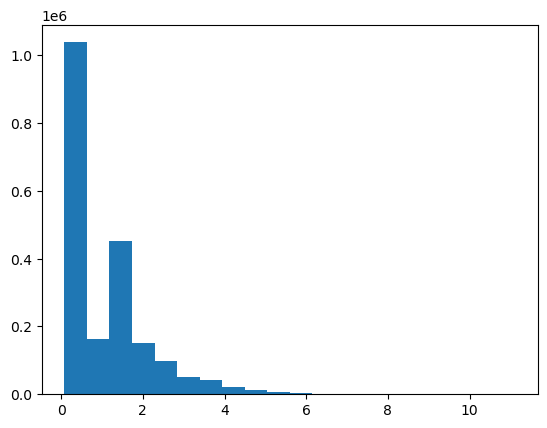

In [25]:
plt.hist(dt.Global_active_power, bins = 20)
plt.show()

from the above histogram plot we can clearly see that **`data is not normally distributed.`**

## DAgostinos K2 Test For Normality

In [26]:
from scipy.stats import normaltest

In [27]:
stat, p = normaltest(df.Global_active_power)

alpha = 0.05

print(f'Statistical Value : {stat:.3f}')

if p < 0.05:
    print(f'P-Value : {p} || Reject the Null hypothesis: Data is not Normally Distributed!!!')
else:
    print(f'P-Value : {p} || Fail to Reject the Null hypothesis: Data is Normally Distributed!!!')

Statistical Value : 724881.795
P-Value : 0.0 || Reject the Null hypothesis: Data is not Normally Distributed!!!


## Quantile - Quantile Plot

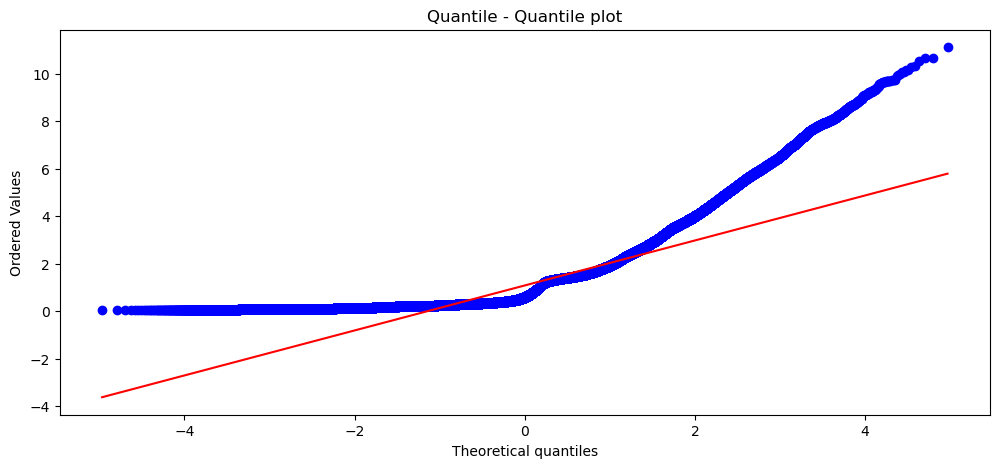

In [28]:
from scipy.stats import probplot
plt.figure(figsize = (12,5))
probplot(dt.Global_active_power, dist = 'norm', plot = plt)
plt.title('Quantile - Quantile plot')
plt.show()

The data is not following a **`normal distribution.`**

### Calculating the **`Kurtosis`** and **`Skewness`** to determine if the data departs from the normal distribution.

In [29]:
from scipy.stats import kurtosis, skew
print('Kurtosis : ', kurtosis(df.Global_active_power))
print('Skewness : ', skew(df.Global_active_power))

Kurtosis :  4.218671866132123
Skewness :  1.7862320846320818


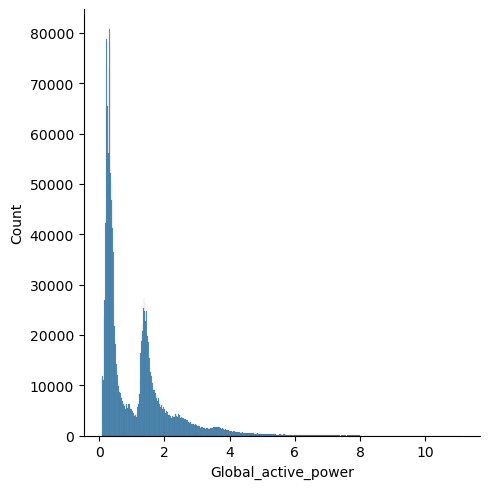

In [30]:
sns.displot(df.Global_active_power)
plt.show()

In [31]:
df1 = df.loc[:,['date_time','Global_active_power']]
df1.set_index('date_time', inplace = True)

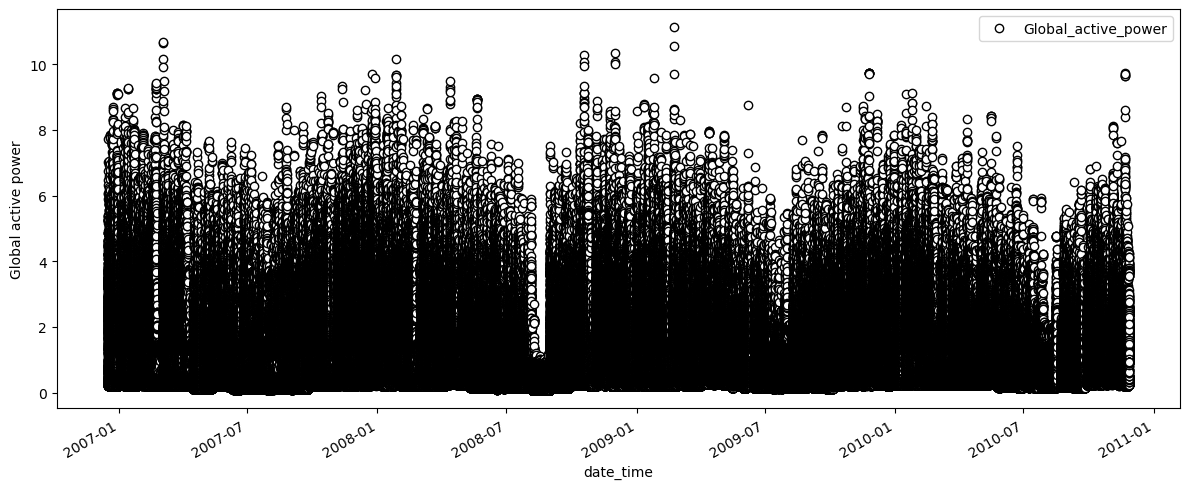

In [32]:
df1.plot(figsize = (12,5), marker = 'o', markerfacecolor = 'white', markeredgecolor = 'k', linestyle = 'None')
# linestyle = 'None' --> This disables the connecting lines between the markers, leaving only the markers visible.
plt.ylabel('Global active power')
plt.legend()

plt.tight_layout()
plt.show()

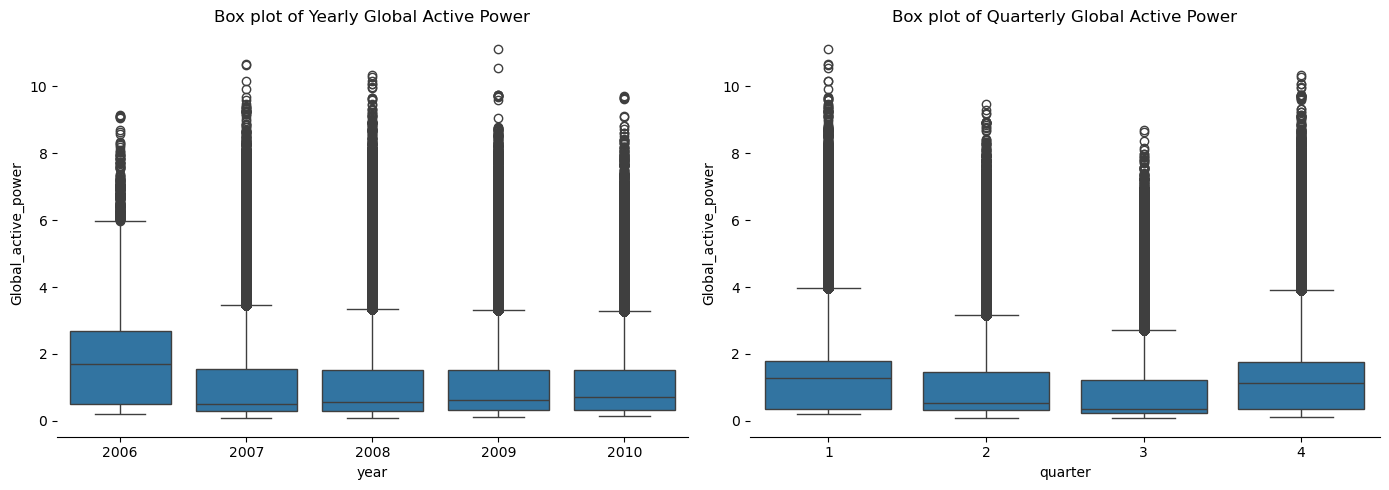

In [33]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
# plt.subplots_adjust(wspace=0.2)
sns.boxplot(x="Year", y="Global_active_power", data=df)
plt.xlabel('year')
plt.title('Box plot of Yearly Global Active Power')
sns.despine(left = True)

plt.subplot(1,2,2)
sns.boxplot(x="Quarter", y="Global_active_power", data=df)
plt.xlabel('quarter')
plt.title('Box plot of Quarterly Global Active Power')
sns.despine(left = True)

plt.tight_layout()
plt.show()

## Global Active Power Distribution

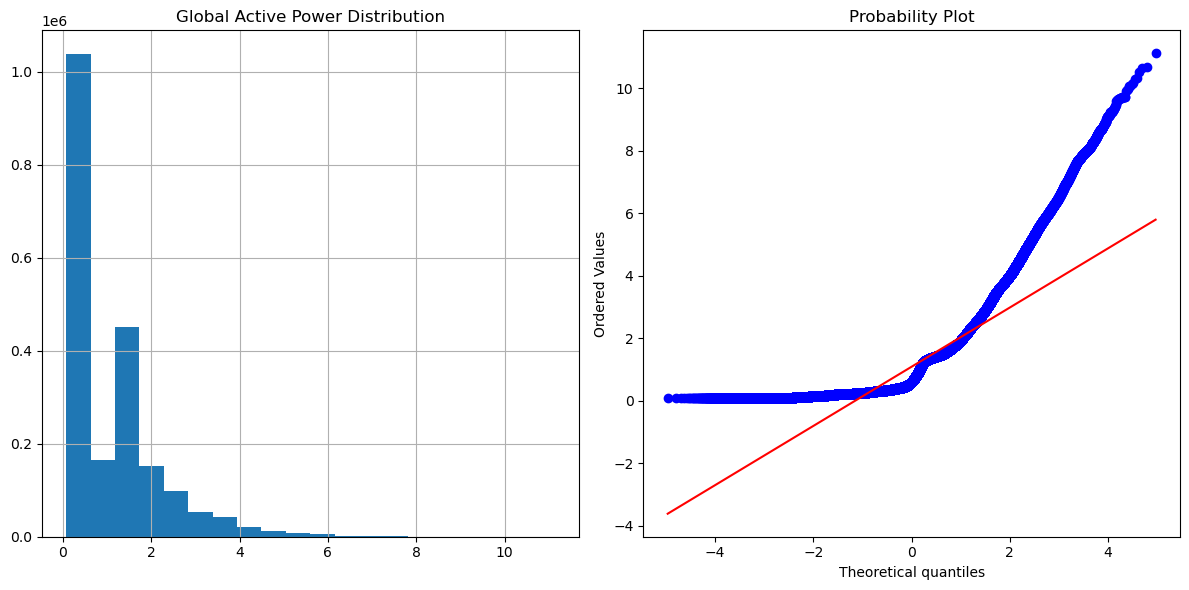

In [34]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
df.Global_active_power.hist(bins = 20)
plt.title('Global Active Power Distribution')

plt.subplot(1,2,2)
probplot(df.Global_active_power, dist = 'norm', plot = plt)
plt.tight_layout()
plt.show()

In [35]:
df.Global_active_power.describe().T

count   2049280.0000
mean          1.0916
std           1.0573
min           0.0760
25%           0.3080
50%           0.6020
75%           1.5280
max          11.1220
Name: Global_active_power, dtype: float64

## Average Global Active Power Resampled Over Day, Week, Month, Quarter and Year


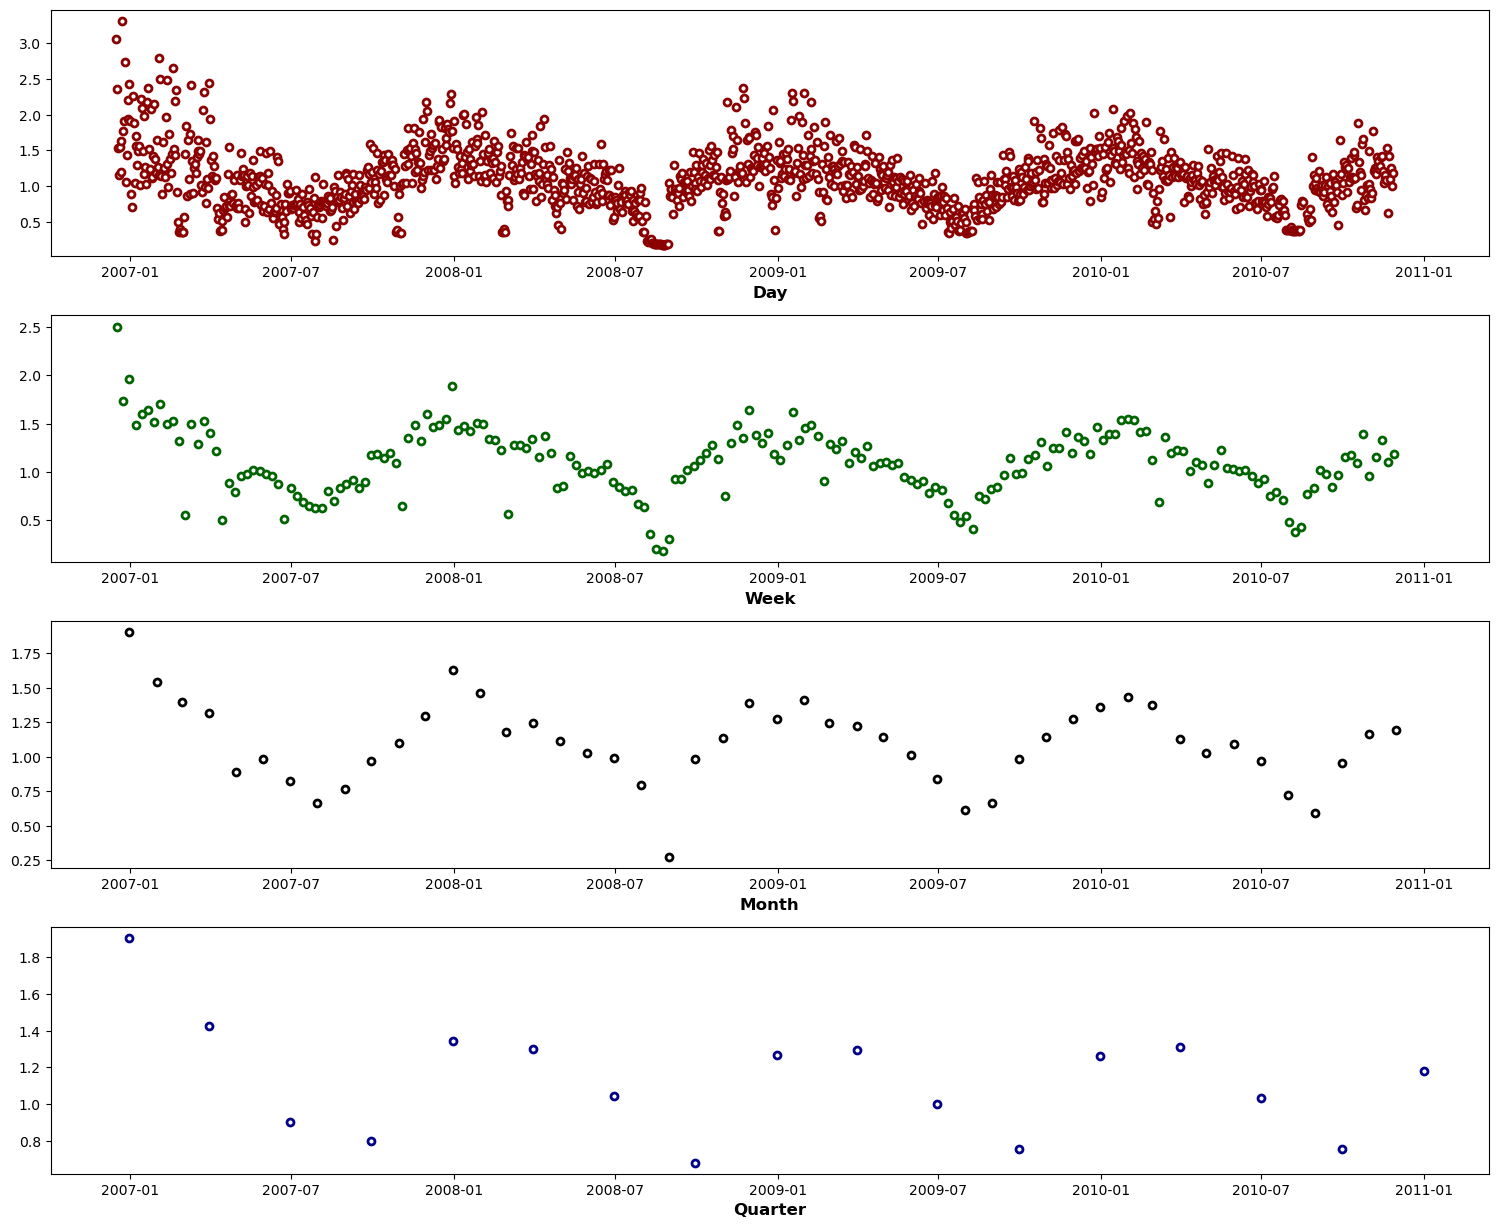

In [36]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(5,1,1)
ax1.plot(df1['Global_active_power'].resample('D').mean(),marker = 'o',markeredgewidth = 2, markerfacecolor = 'white',markersize = 5, markeredgecolor = 'darkred', linestyle = 'None')
ax1.set_xlabel('Day', fontsize = 12, fontweight = 'bold')

ax2 = fig.add_subplot(5,1,2, sharex = ax1)
ax2.plot(df1['Global_active_power'].resample('W').mean(),marker = 'o',markeredgewidth = 2, markerfacecolor = 'white',markersize = 5, markeredgecolor = 'darkgreen', linestyle = 'None')
ax2.set_xlabel('Week', fontsize = 12, fontweight = 'bold')

ax3 = fig.add_subplot(5,1,3, sharex = ax1)
ax3.plot(df1['Global_active_power'].resample('ME').mean(),marker = 'o',markeredgewidth = 2, markerfacecolor = 'white',markersize = 5, markeredgecolor = 'k', linestyle = 'None')
ax3.set_xlabel('Month', fontsize = 12, fontweight = 'bold')

ax3 = fig.add_subplot(5,1,4, sharex = ax1)
ax3.plot(df1['Global_active_power'].resample('QE').mean(),marker = 'o',markeredgewidth = 2, markerfacecolor = 'white',markersize = 5, markeredgecolor = 'darkblue', linestyle = 'None')
ax3.set_xlabel('Quarter', fontsize = 12, fontweight = 'bold')

# ax3 = fig.add_subplot(5,1,5, sharex = ax1)
# ax3.plot(df1['Global_active_power'].resample('YE').mean(),marker = 'o',markeredgewidth = 1, markerfacecolor = 'white',markersize = 8, markeredgecolor = 'purple', linestyle = 'None')
# ax3.set_xlabel('Year', fontsize = 12, fontweight = 'bold')

plt.tight_layout()
plt.show()

In [37]:
df.columns

Index(['date_time', 'Global_active_power', 'Year', 'Quarter', 'Month', 'Day',
       'Week_day'],
      dtype='object')

In [38]:
df.filter(regex = '^[A-Z]', axis = 1)

,Global_active_power,Year,Quarter,Month,Day,Week_day
0,4.2160,2006,4,12,16,5
1,5.3600,2006,4,12,16,5
2,5.3740,2006,4,12,16,5
3,5.3880,2006,4,12,16,5
4,3.6660,2006,4,12,16,5
...,...,...,...,...,...,...
2049275,0.9460,2010,4,11,26,4
2049276,0.9440,2010,4,11,26,4
2049277,0.9380,2010,4,11,26,4
2049278,0.9340,2010,4,11,26,4


In [39]:
df.filter(regex = '^[a-z]', axis = 1)

,date_time
0,2006-12-16 17:24:00
1,2006-12-16 17:25:00
2,2006-12-16 17:26:00
3,2006-12-16 17:27:00
4,2006-12-16 17:28:00
...,...
2049275,2010-11-26 20:58:00
2049276,2010-11-26 20:59:00
2049277,2010-11-26 21:00:00
2049278,2010-11-26 21:01:00


## Plot Mean Global Active Power Grouped by Year, Quarter, Month and Day

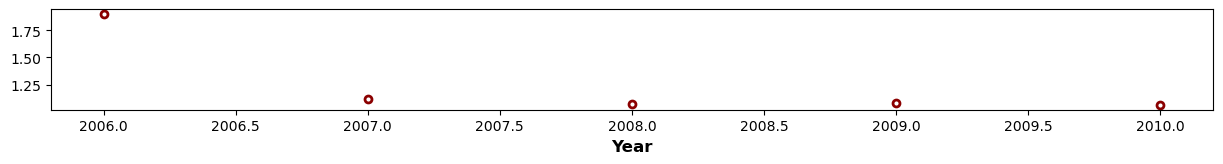

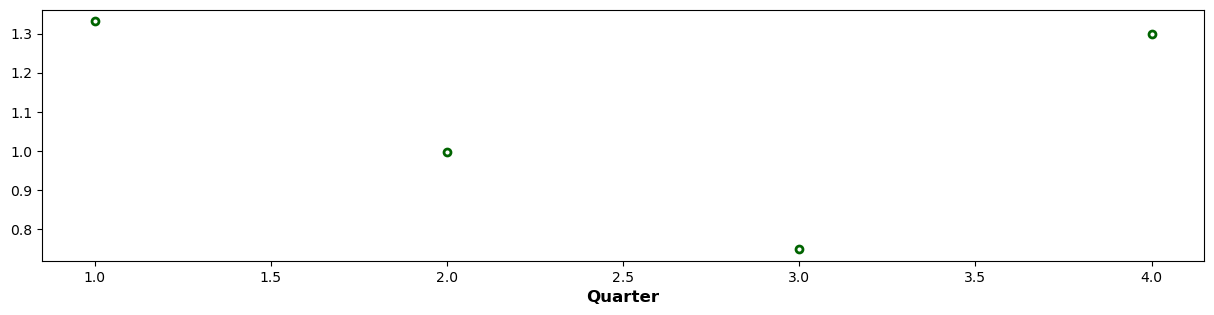

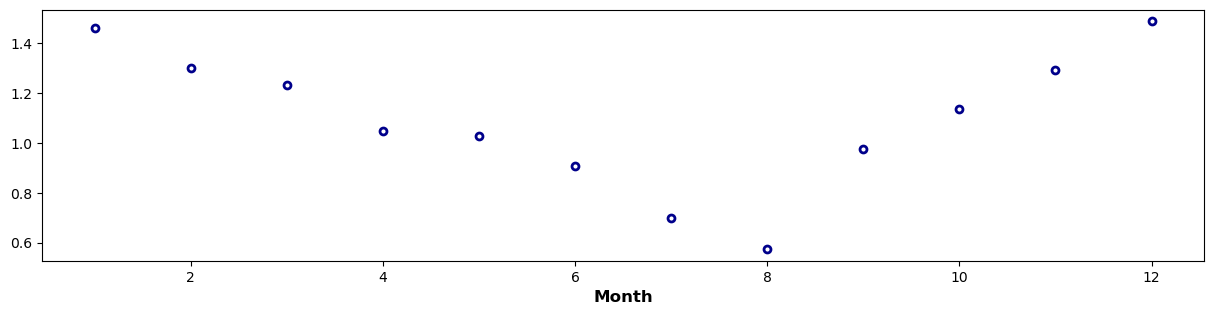

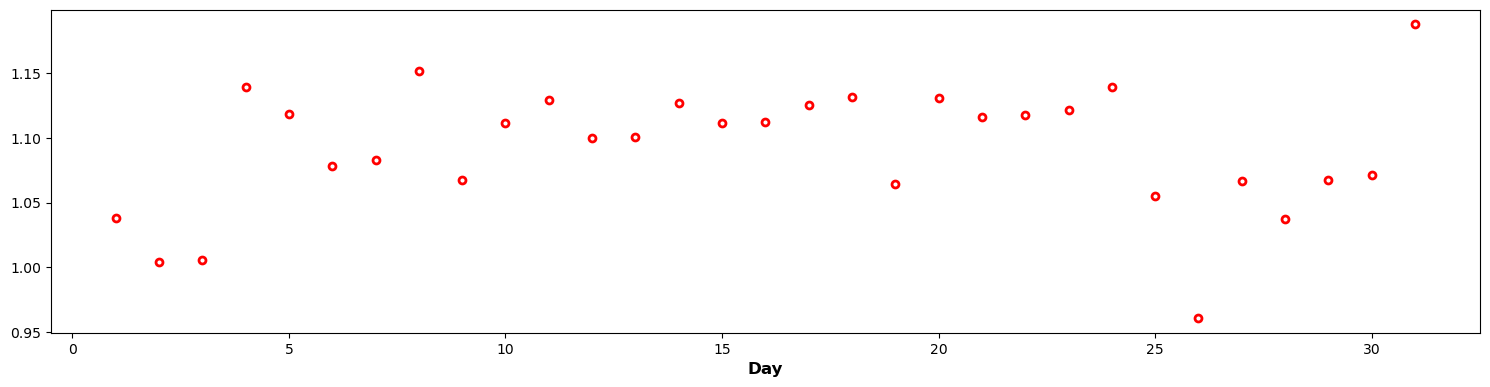

In [40]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(4,1,1)
df.groupby('Year').Global_active_power.agg('mean').plot(marker = 'o',markeredgewidth = 2, markerfacecolor = 'white',markersize = 5, markeredgecolor = 'darkred', linestyle = 'None')
ax1.set_xlabel('Year', fontsize = 12, fontweight = 'bold')

fig = plt.figure(figsize=(15,15))
ax2 = fig.add_subplot(4,1,2)
df.groupby('Quarter').Global_active_power.agg('mean').plot(marker = 'o',markeredgewidth = 2, markerfacecolor = 'white',markersize = 5, markeredgecolor = 'darkgreen', linestyle = 'None')
ax2.set_xlabel('Quarter', fontsize = 12, fontweight = 'bold')

fig = plt.figure(figsize=(15,15))
ax3 = fig.add_subplot(4,1,3)
df.groupby('Month').Global_active_power.agg('mean').plot(marker = 'o',markeredgewidth = 2, markerfacecolor = 'white',markersize = 5, markeredgecolor = 'darkblue', linestyle = 'None')
ax3.set_xlabel('Month', fontsize = 12, fontweight = 'bold')

fig = plt.figure(figsize=(15,15))
ax4 = fig.add_subplot(4,1,3)
df.groupby('Day').Global_active_power.agg('mean').plot(marker = 'o',markeredgewidth = 2, markerfacecolor = 'white',markersize = 5, markeredgecolor = 'red', linestyle = 'None')
ax4.set_xlabel('Day', fontsize = 12, fontweight = 'bold')

plt.tight_layout()
plt.show()

The above plots confirmed our previous discoveries. 

- By **year**, it was steady. 
- By **quarter**, the lowest average power consumption was in the 3rd quarter.
- By **month**, the lowest average power consumption was in July and August.
- By **day**, the lowest average power consumption was around 8th of the month

## Global Active Power by Years

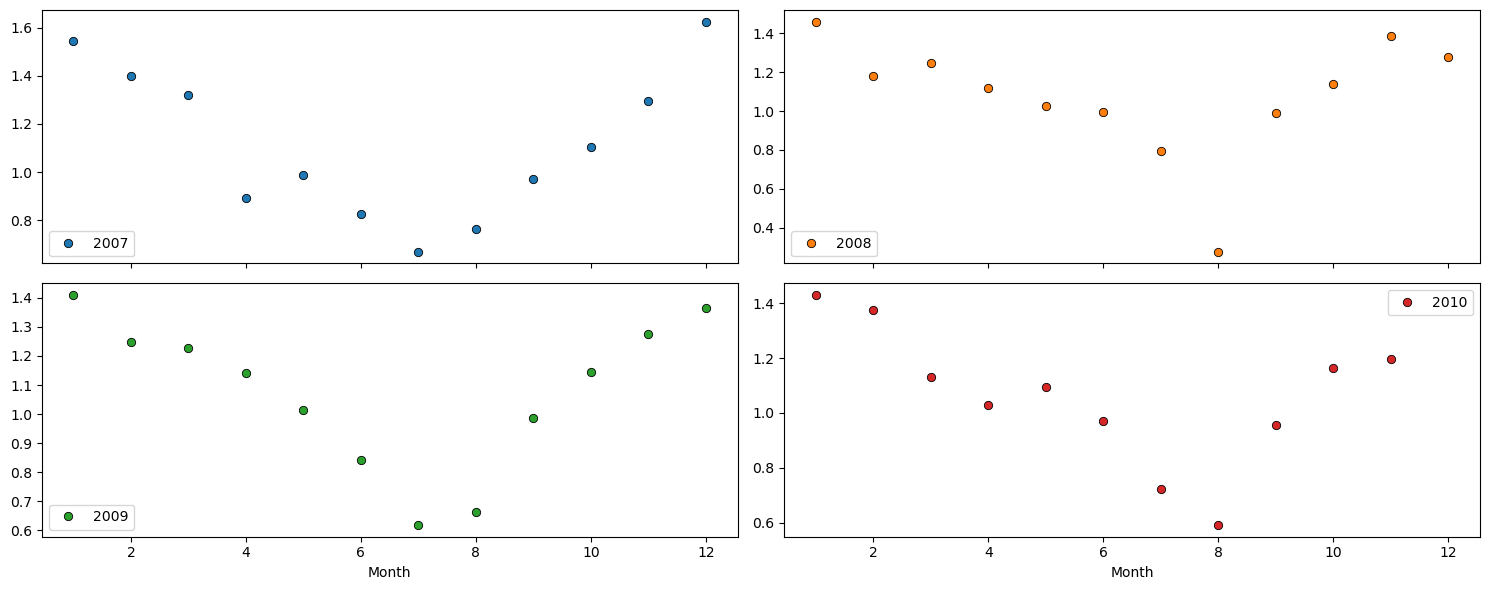

In [41]:
pd.pivot_table(df.loc[df['Year'] != 2006], values = 'Global_active_power', columns = 'Year',index = 'Month').\
plot(figsize = (15,6),subplots = True, layout = (2,2),linestyle  = 'None', marker = 'o',\
     markeredgecolor = 'k', markeredgewidth = 0.6)

plt.tight_layout()
plt.show()

The pattern is similar every year from **2007 to 2010**.

## Global Active Power Consumption in Weekdays vs. Weekends

In [42]:
df.columns

Index(['date_time', 'Global_active_power', 'Year', 'Quarter', 'Month', 'Day',
       'Week_day'],
      dtype='object')

In [43]:
df.drop(columns = 'Week_day', inplace = True)

In [44]:
df.head()

,date_time,Global_active_power,Year,Quarter,Month,Day
0,2006-12-16 17:24:00,4.2160,2006,4,12,16
1,2006-12-16 17:25:00,5.3600,2006,4,12,16
2,2006-12-16 17:26:00,5.3740,2006,4,12,16
3,2006-12-16 17:27:00,5.3880,2006,4,12,16
4,2006-12-16 17:28:00,3.6660,2006,4,12,16


In [45]:
from datetime import datetime
df.date_time.dt.day_name().value_counts()
df['Weekdaysends_name'] = df.date_time.dt.day_name()

In [46]:
df.date_time.dt.quarter
df.date_time.dt.year
df.date_time.dt.month
df.date_time.dt.day

0          16
1          16
2          16
3          16
4          16
           ..
2049275    26
2049276    26
2049277    26
2049278    26
2049279    26
Name: date_time, Length: 2049280, dtype: int32

In [47]:
def weekends_and_days(x):
    if x in ['Saturday','Sunday']:
        return 0
    else:
        return 1

In [48]:
df['Week_value'] = df.Weekdaysends_name.apply(weekends_and_days)

In [49]:
df.Week_value.value_counts()

Week_value
1    1470428
0     578852
Name: count, dtype: int64

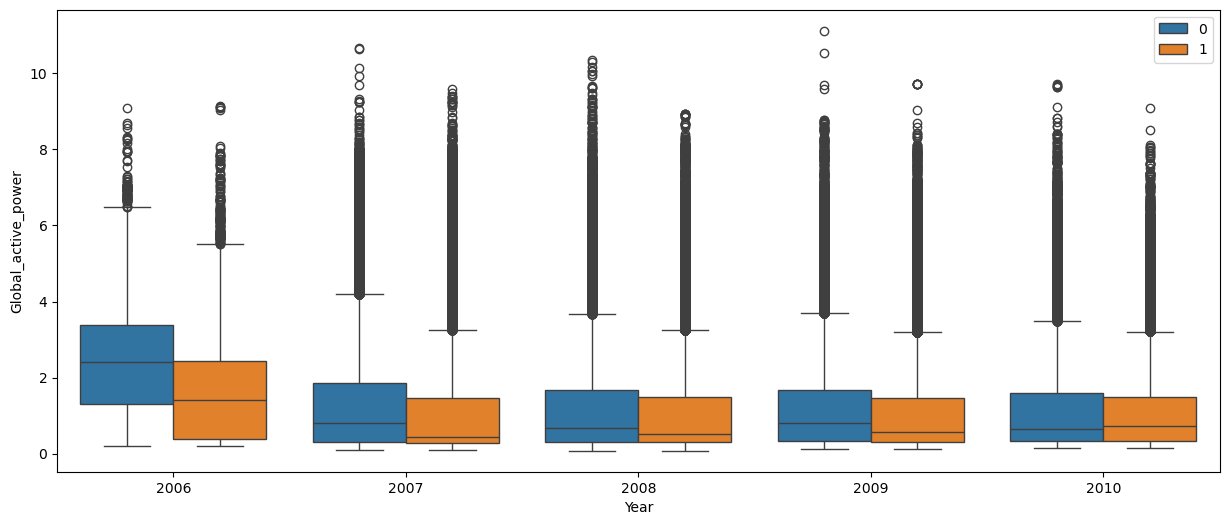

In [50]:
plt.figure(figsize = (15,6))

sns.boxplot(data = df,x = 'Year', y = 'Global_active_power', hue = 'Week_value')
plt.legend()
plt.show()

**The median global active power in weekdays seems to be lower than the weekends prior to 2010**. 

In 2010, they were nearly identical.

<Figure size 1500x500 with 0 Axes>

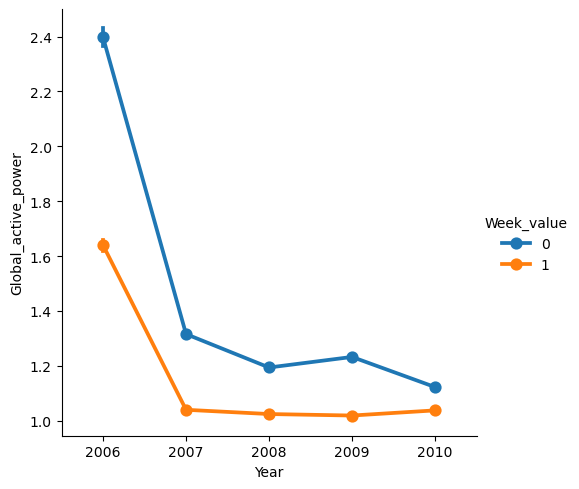

In [51]:
plt.figure(figsize = (15,5))
sns.catplot(x = 'Year', y = 'Global_active_power', kind = 'point',hue = 'Week_value', data = df)

plt.show()

## Checking for Stationarity of the data

We will use **Augmented Dickey Fuller Test** to check for stationarity of the data.

**`Null Hypothesis (H0):`** It suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.

**`Alternate Hypothesis (H1):`** It suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

### Stationary Series
- Stationary series has **`constant mean and variance`** over time. 
- **Rolling average and the rolling standard deviation** of time series **`do not change over time`**.

In [52]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf

In [53]:
def test_stationarity(timeseries):
    dftest = adfuller(timeseries)
    return dftest

In [54]:
# result = test_stationarity(dt.Global_active_power.values)

In [55]:
# print(f'Test Statistic : {result[0]}')

In [56]:
# P-value 

# if result[1] < 0.05:
#     print(f'P-value will be {result[1]:.5f}, so Time series has a unit root and It is a Non-stationary Data')
# else:
#     print(f'P-value will be {result[1]:.5f}, so Time series has no unit root and It is a Stationary Data')

# for key, value in result[4].items():
#     print(f'Critical value at {key}: {value}')

## Preparing the data before constructing the LSTM Model

In [57]:
dataset = df.Global_active_power.values
dataset

array([4.216, 5.36 , 5.374, ..., 0.938, 0.934, 0.932])

In [58]:
dataset = dataset.astype('float')

In [59]:
dataset = dataset.reshape(-1,1)

In [60]:
dataset

array([[4.216],
       [5.36 ],
       [5.374],
       ...,
       [0.938],
       [0.934],
       [0.932]])

In [61]:
from sklearn.preprocessing import MinMaxScaler

In [62]:
scaler = MinMaxScaler(feature_range = (0,1))
dataset = scaler.fit_transform(dataset)
dataset

array([[0.37479631],
       [0.47836321],
       [0.47963064],
       ...,
       [0.0780373 ],
       [0.07767518],
       [0.07749412]])

In [63]:
train_size = int(len(dataset) * 0.8)
train_size

1639424

In [64]:
test_size = len(dataset) - train_size
test_size

409856

In [65]:
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset), :]

In [66]:
train

array([[0.37479631],
       [0.47836321],
       [0.47963064],
       ...,
       [0.02426218],
       [0.02426218],
       [0.0311425 ]])

In [67]:
test

array([[0.04236828],
       [0.04091979],
       [0.04091979],
       ...,
       [0.0780373 ],
       [0.07767518],
       [0.07749412]])

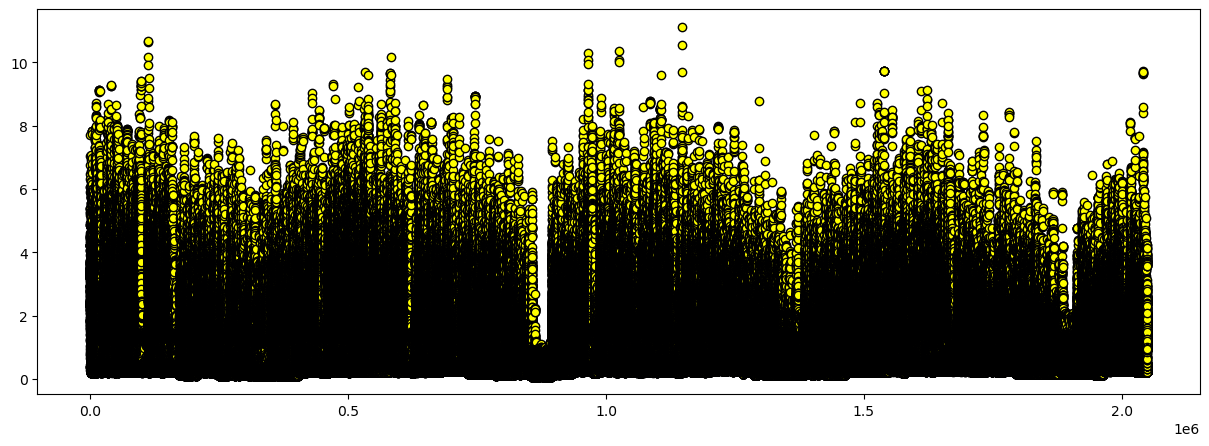

In [68]:
df.Global_active_power.plot(figsize = (15,5), marker = 'o', markeredgecolor = 'k', markerfacecolor = 'yellow', linestyle = 'None')
plt.show()

In [69]:
dataset[0:4,0]

array([0.37479631, 0.47836321, 0.47963064, 0.48089806])

In [70]:
def create_dataset(dataset, look_back = 1):
    X,y = [] , []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

In [71]:
look_back = 30

X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

In [72]:
X_train

array([[0.37479631, 0.47836321, 0.47963064, ..., 0.28535216, 0.28806808,
        0.28082564],
       [0.47836321, 0.47963064, 0.48089806, ..., 0.28806808, 0.28082564,
        0.23936267],
       [0.47963064, 0.48089806, 0.32500453, ..., 0.28082564, 0.23936267,
        0.33333333],
       ...,
       [0.03259098, 0.03240992, 0.03259098, ..., 0.02480536, 0.02408112,
        0.02390005],
       [0.03240992, 0.03259098, 0.03367735, ..., 0.02408112, 0.02390005,
        0.02426218],
       [0.03259098, 0.03367735, 0.03277204, ..., 0.02390005, 0.02426218,
        0.02426218]])

In [73]:
y_train

array([0.23936267, 0.33333333, 0.38620315, ..., 0.02426218, 0.02426218,
       0.02426218])

In [74]:
X_test

array([[0.04236828, 0.04091979, 0.04091979, ..., 0.01846822, 0.01738186,
        0.01756292],
       [0.04091979, 0.04091979, 0.04037661, ..., 0.01738186, 0.01756292,
        0.01738186],
       [0.04091979, 0.04037661, 0.04128191, ..., 0.01756292, 0.01738186,
        0.01846822],
       ...,
       [0.07984791, 0.08183958, 0.08202064, ..., 0.07839942, 0.07876154,
        0.07876154],
       [0.08183958, 0.08202064, 0.08202064, ..., 0.07876154, 0.07876154,
        0.07858048],
       [0.08202064, 0.08202064, 0.08165852, ..., 0.07876154, 0.07858048,
        0.0780373 ]])

In [75]:
y_test

array([0.01738186, 0.01846822, 0.01738186, ..., 0.07858048, 0.0780373 ,
       0.07767518])

In [76]:
X_train.shape

(1639393, 30)

In [77]:
# Reshaping the input to be [samples, time steps, features]

X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

X_train.shape, X_test.shape

((1639393, 1, 30), (409825, 1, 30))

In [78]:
X_train.shape[1], X_train.shape[2]

(1, 30)

In [79]:
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.models import Model
import tensorflow as tf

In [80]:
# Training the model

input = Input(shape = (X_train.shape[1], X_train.shape[2]),dtype = tf.float32, name = 'Input Layer')
x = LSTM(100)(input)
output = Dense(1)(x)

model_1 = Model(inputs = input, outputs = output, name = 'LSTM_Model')

model_1.compile(
    loss = 'mae',
    metrics = ['mae'],
    optimizer = tf.keras.optimizers.Adam()
)

model_1_hist = model_1.fit(X_train, y_train,
                         batch_size = 30, 
                        validation_data = (X_test, y_test),
                          verbose = 1,
                           epochs = 5
                         )

Epoch 1/5
54647/54647 ━━━━━━━━━━━━━━━━━━━━ 206s 4ms/step - loss: 0.0091 - mae: 0.0091 - val_loss: 0.0068 - val_mae: 0.0068
Epoch 2/5
54647/54647 ━━━━━━━━━━━━━━━━━━━━ 200s 4ms/step - loss: 0.0081 - mae: 0.0081 - val_loss: 0.0070 - val_mae: 0.0070
Epoch 3/5
54647/54647 ━━━━━━━━━━━━━━━━━━━━ 202s 4ms/step - loss: 0.0081 - mae: 0.0081 - val_loss: 0.0065 - val_mae: 0.0065
Epoch 4/5
54647/54647 ━━━━━━━━━━━━━━━━━━━━ 201s 4ms/step - loss: 0.0081 - mae: 0.0081 - val_loss: 0.0067 - val_mae: 0.0067
Epoch 5/5
54647/54647 ━━━━━━━━━━━━━━━━━━━━ 201s 4ms/step - loss: 0.0080 - mae: 0.0080 - val_loss: 0.0067 - val_mae: 0.0067


In [92]:
model_1.summary()

Model: "LSTM_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input Layer (InputLayer)             │ (None, 1, 30)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 100)                 │          52,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 157,505 (615.26 KB)

 Trainable params: 52,501 (205.08 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 105,004 (410.18 KB)

In [81]:
train_predict = model_1.predict(X_train)
test_predict = model_1.predict(X_test)

51232/51232 ━━━━━━━━━━━━━━━━━━━━ 130s 3ms/step
12808/12808 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step


In [85]:
test_predict.reshape(-1)

array([0.01683833, 0.0166543 , 0.01778546, ..., 0.07840882, 0.07827329,
       0.07770655], dtype=float32)

In [83]:
y_test

array([0.01738186, 0.01846822, 0.01738186, ..., 0.07858048, 0.0780373 ,
       0.07767518])

In [88]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

mae = mean_absolute_error(y_true = y_test, y_pred = test_predict.reshape(-1))
rmse = root_mean_squared_error(y_true = y_test, y_pred = test_predict.reshape(-1))

mae, rmse

(0.0067007254736224, 0.019951329992981968)

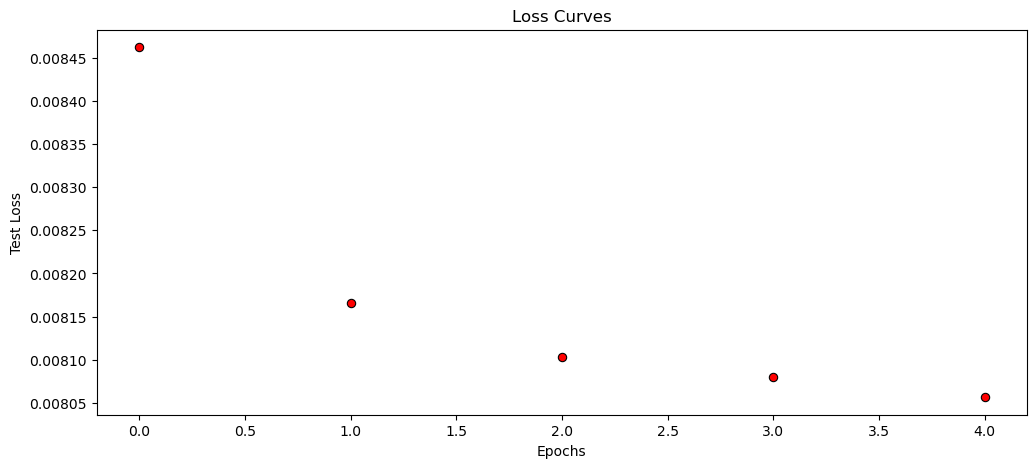

In [104]:
# plotting model loss

plt.figure(figsize = (12,5))

model_1_dt = pd.DataFrame(model_1_hist.history)
plt.plot(model_1_dt.index,model_1_dt['loss'], label = 'Test Loss',linestyle = 'None', marker = 'o',\
         markeredgecolor = 'k', markerfacecolor = 'red', markeredgewidth = 0.8)
plt.xlabel('Epochs')
plt.ylabel('Test Loss')
plt.title('Loss Curves')

plt.show()

## Compare Actual vs. Prediction

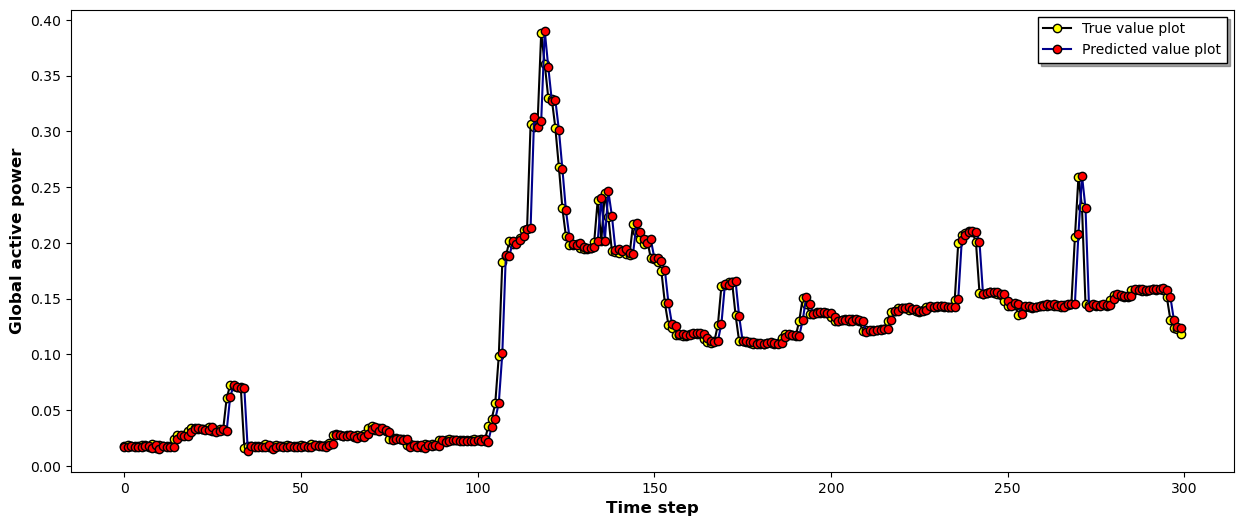

In [122]:
plt.figure(figsize = (15,6))

N = 300
plt.plot([x for x in range(N)], y_test[:N], color = 'k', marker = 'o', markerfacecolor = 'yellow', markeredgecolor = 'k', label = 'True value plot')
plt.plot([x for x in range(N)], test_predict.reshape(-1)[:N], color = 'darkblue', marker = 'o', markerfacecolor = 'red', markeredgecolor = 'k', label = 'Predicted value plot')
plt.legend(fancybox = False, shadow = True, edgecolor = 'k')
plt.xlabel('Time step', fontsize = 12, fontweight = 'bold')
plt.ylabel('Global active power', fontsize = 12, fontweight = 'bold')
plt.show()